## Download data

We illustrate the usage of LOG-TRAM by applying it to the GWAS summary statistics of 26 other traits from EAS and EUR with 1 Mbp non-overlapping sliding windows as local regions. The LDscores files involved in the following example are availabel from [here](https://www.dropbox.com/sh/9asugdlu1lbal8o/AAB0martsgaBoR8B4hq2pc25a?dl=0).
The GWAS datasets were obtained from the links summarized in Table S1.

## Run LOG-TRAM

Once the input files are formatted, LOG-TRAM will automatically preprocess the datasets, including SNPs overlapping and minor allele matching.

In [1]:
Traits = 'AD,AF,Asthma,BUN,COPD,CoCa,Eosino,FG,FI,Glaucoma,HDL,HbA1c,LDL,Lym,MCH,MCHC,MCV,Mono,Plt,PrCa,RBC,TC,TG,UF,eGFR,height'.split(',')

log_tram_com = 'python <install path>/src/LOG-TRAM.py \
--out {0}_meta \
--sumstats-popu1 {0}_harmonized_pop1_EUR.txt,{0}_EUR \
--sumstats-popu2 {0}_harmonized_pop2_EAS.txt,{0}_EAS \
--ldscores ./LDscoresEUR-EAS/ldsc_annot_EUR_EAS_1mb_TGP_hm3_chr@_std\n'
for i in Traits:
    print(log_tram_com.format(i))

python <install path>/src/LOG-TRAM.py --out AD_meta --sumstats-popu1 AD_harmonized_pop1_EUR.txt,AD_EUR --sumstats-popu2 AD_harmonized_pop2_EAS.txt,AD_EAS --ldscores ./LDscoresEUR-EAS/ldsc_annot_EUR_EAS_1mb_TGP_hm3_chr@_std

python <install path>/src/LOG-TRAM.py --out AF_meta --sumstats-popu1 AF_harmonized_pop1_EUR.txt,AF_EUR --sumstats-popu2 AF_harmonized_pop2_EAS.txt,AF_EAS --ldscores ./LDscoresEUR-EAS/ldsc_annot_EUR_EAS_1mb_TGP_hm3_chr@_std

python <install path>/src/LOG-TRAM.py --out Asthma_meta --sumstats-popu1 Asthma_harmonized_pop1_EUR.txt,Asthma_EUR --sumstats-popu2 Asthma_harmonized_pop2_EAS.txt,Asthma_EAS --ldscores ./LDscoresEUR-EAS/ldsc_annot_EUR_EAS_1mb_TGP_hm3_chr@_std

python <install path>/src/LOG-TRAM.py --out BUN_meta --sumstats-popu1 BUN_harmonized_pop1_EUR.txt,BUN_EUR --sumstats-popu2 BUN_harmonized_pop2_EAS.txt,BUN_EAS --ldscores ./LDscoresEUR-EAS/ldsc_annot_EUR_EAS_1mb_TGP_hm3_chr@_std

python <install path>/src/LOG-TRAM.py --out COPD_meta --sumstats-popu1 COPD_har

## Visualize results

In [7]:
import pandas as pd
import numpy as np
import os
import glob as gb

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
style.use('seaborn-white')
import seaborn as sns
import matplotlib as mpl
import sys  
sys.path.append('../src')
from plots import *

### QQ-plot

In [3]:
def qqplotwrapper(eas_gwas,eas_meta,t):
    sns.set_context('paper',font_scale=1.4) 
    mpl.rcParams['figure.dpi']=100
    mpl.rcParams['savefig.dpi']=100
    mpl.rcParams['figure.figsize']=7,7
    mpl.rcParams['axes.spines.right'] = False
    mpl.rcParams['axes.spines.top'] = False
    fig, ax = plt.subplots(1,1)
    qqplot([eas_gwas['P'],eas_meta['P']], 
           ['GWAS','LOG-TRAM'], 
           color=['C2', 'C0', 'C2', 'C3', 'C4', 'C5'],
           shape=['.','.'],
           error_type='theoretical', 
           distribution='beta',
           n_quantiles = 100,
           ms=5,
           title='{} (EAS)'.format(t),ax=ax)

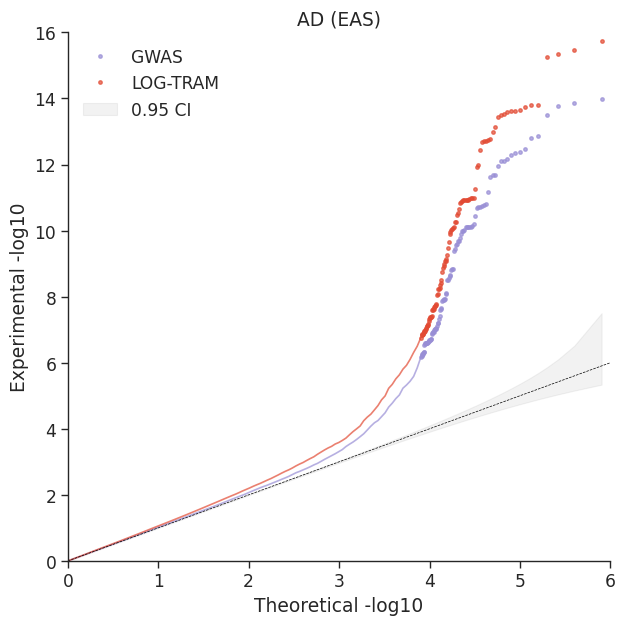

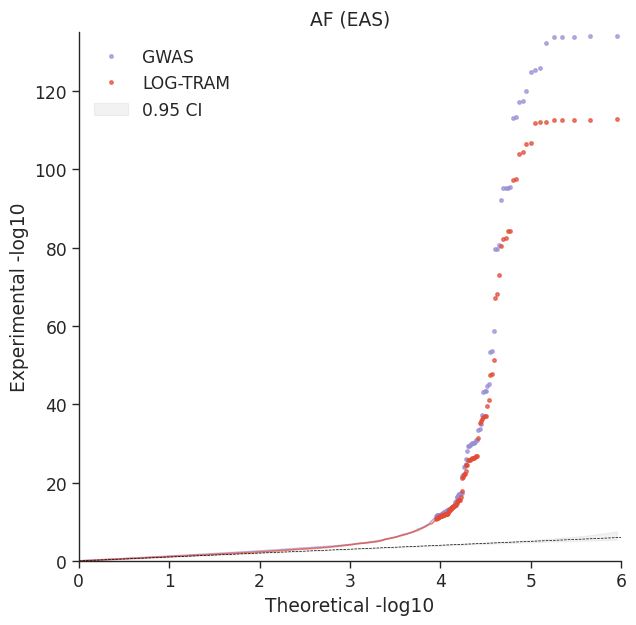

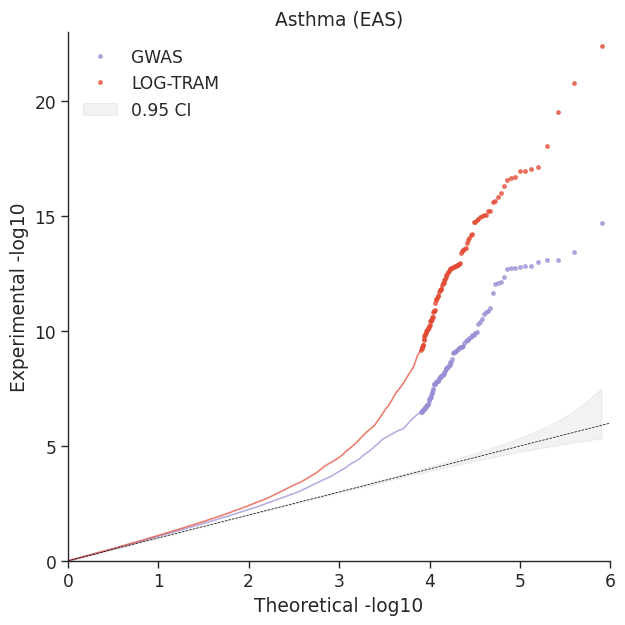

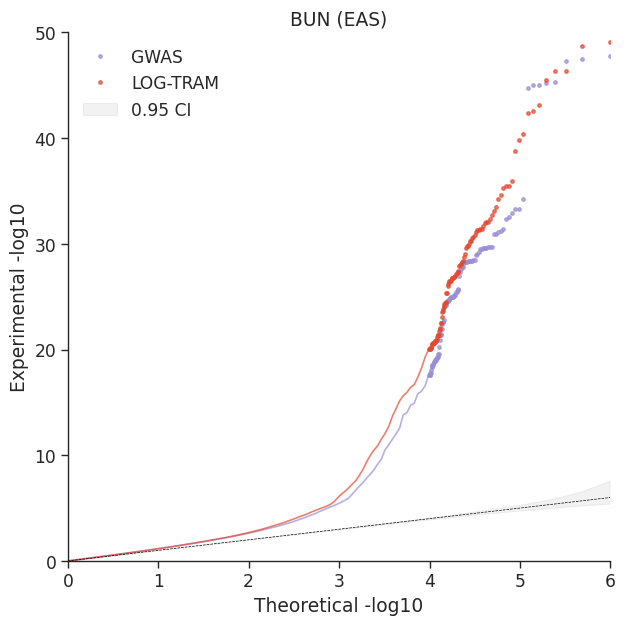

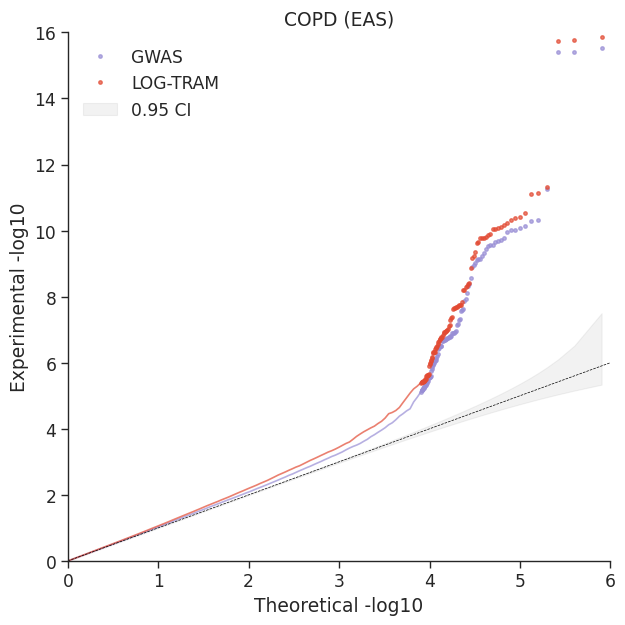

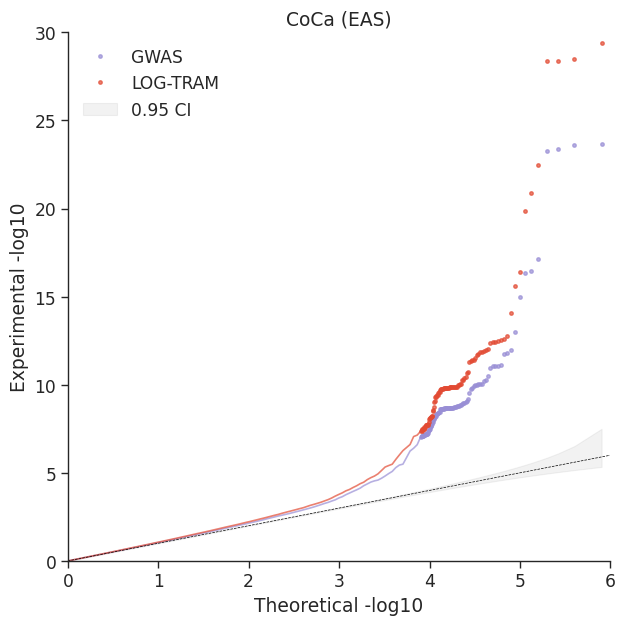

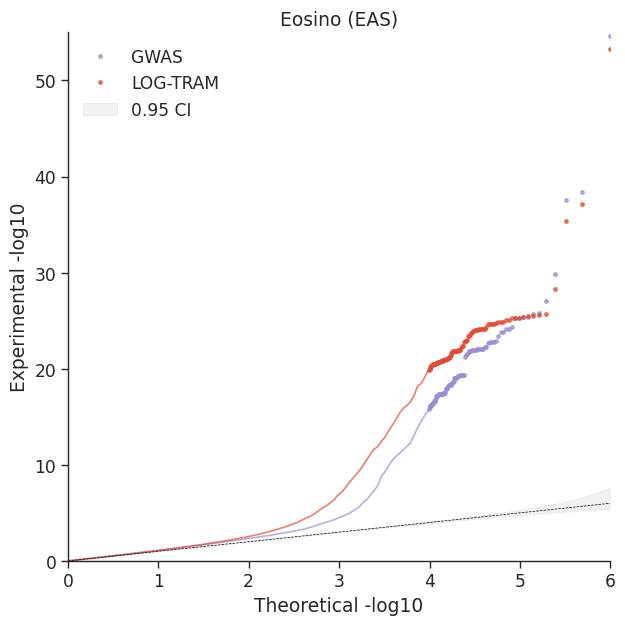

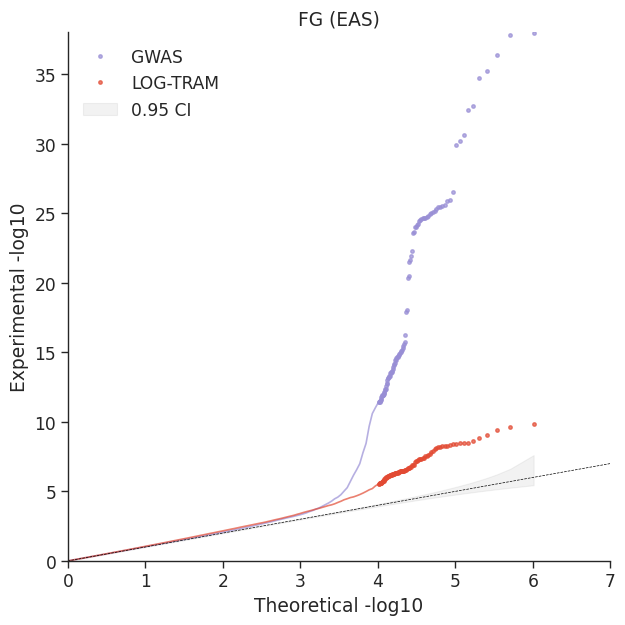

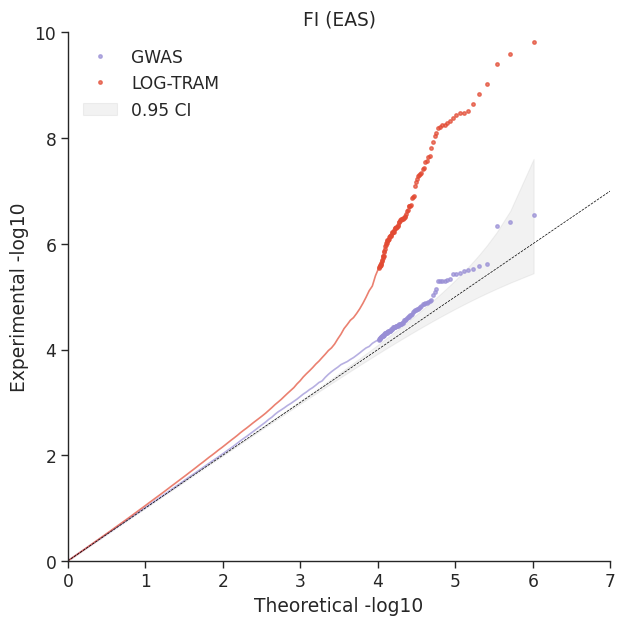

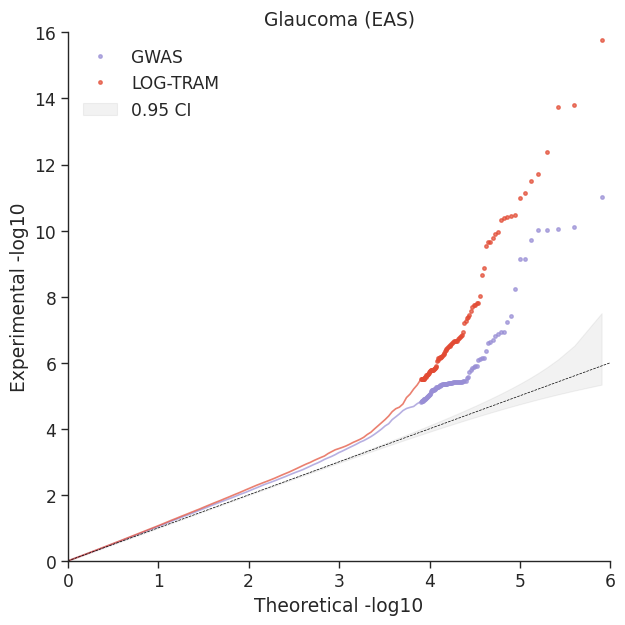

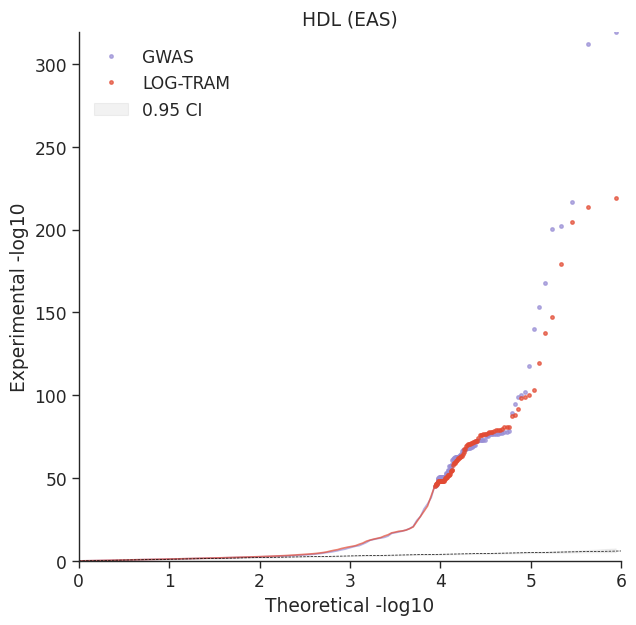

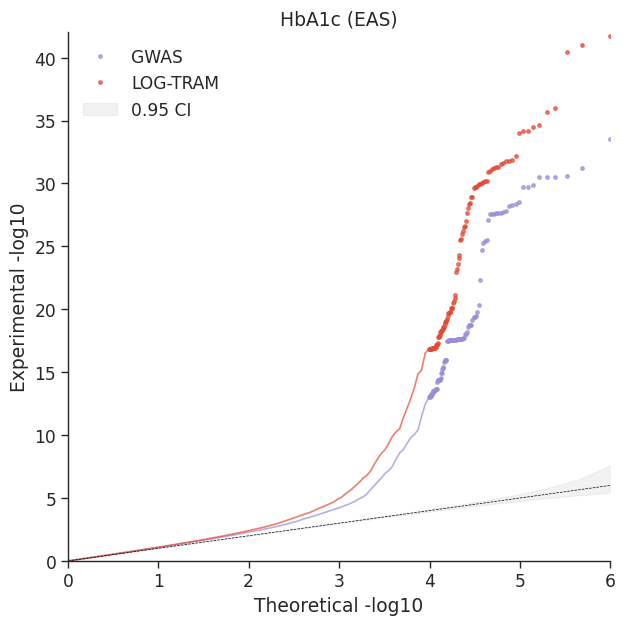

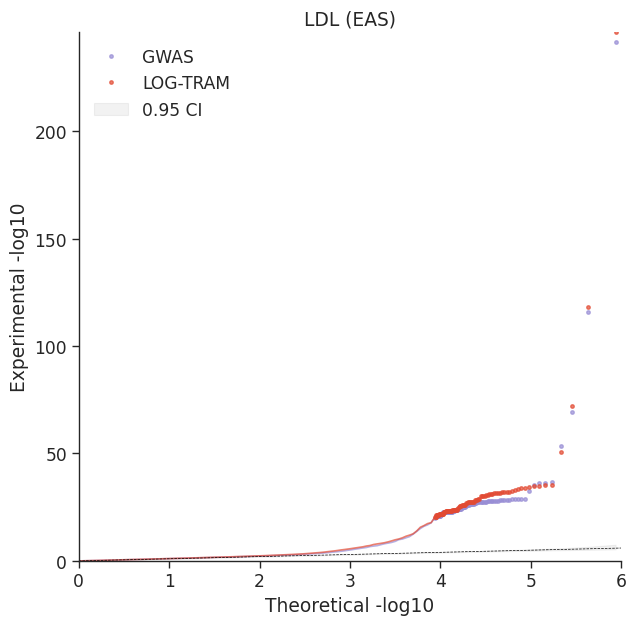

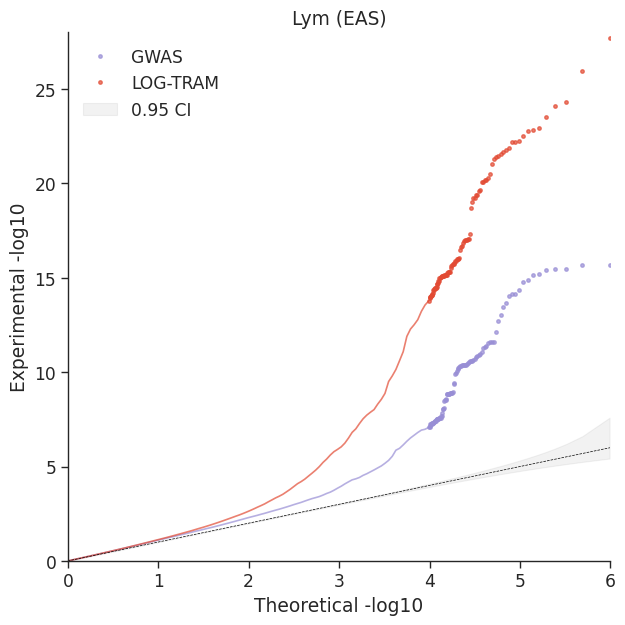

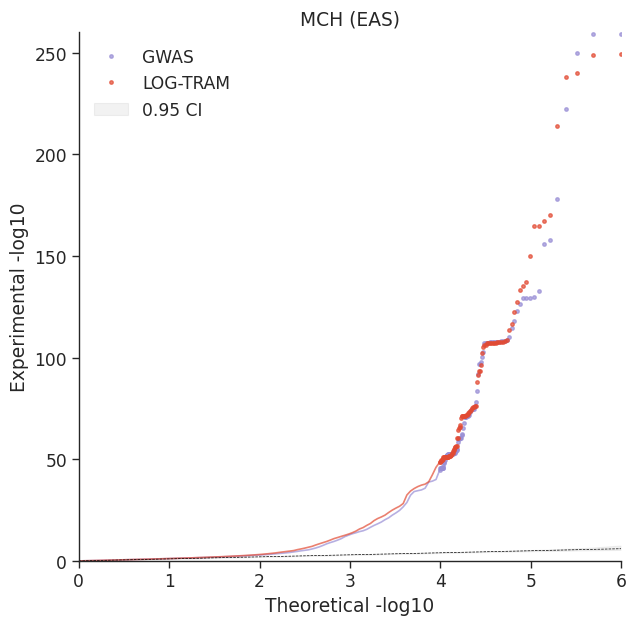

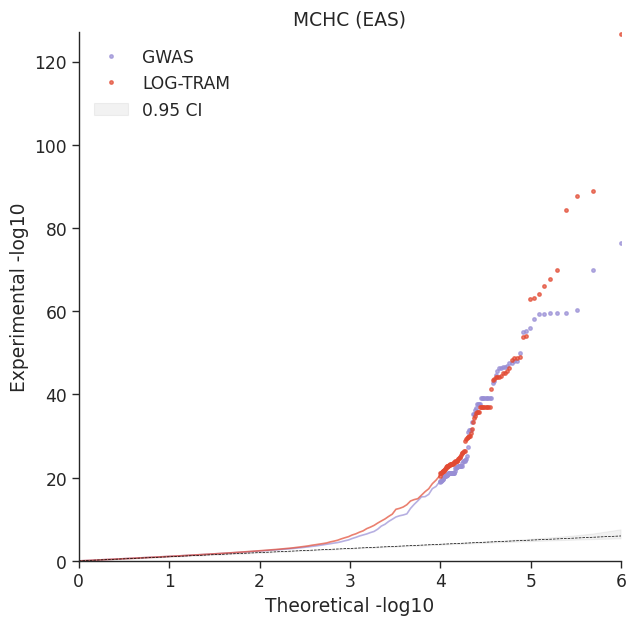

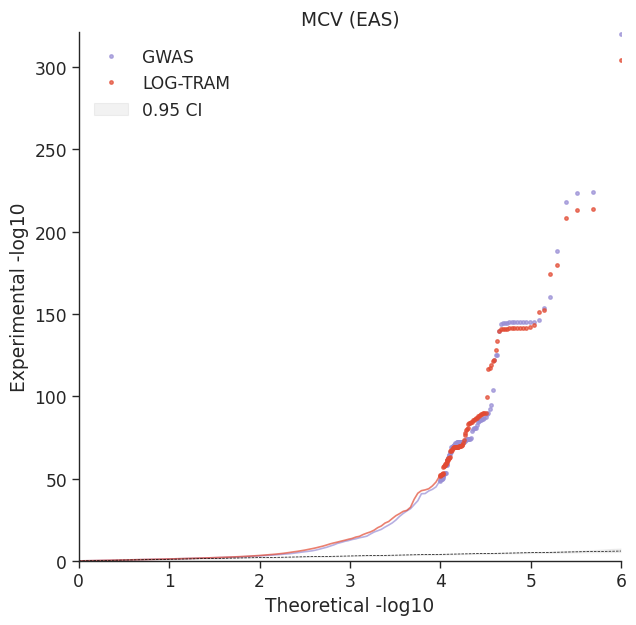

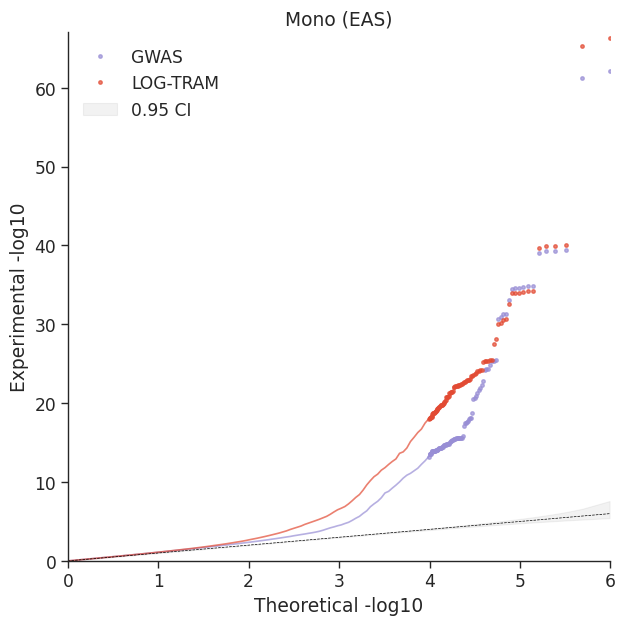

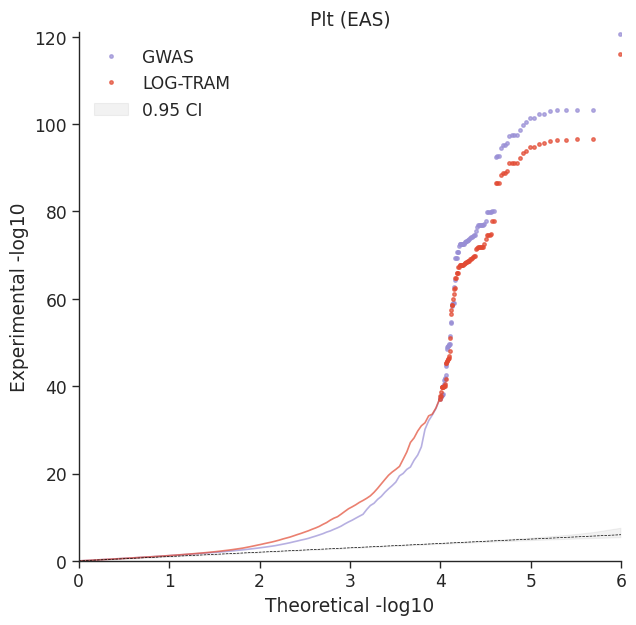

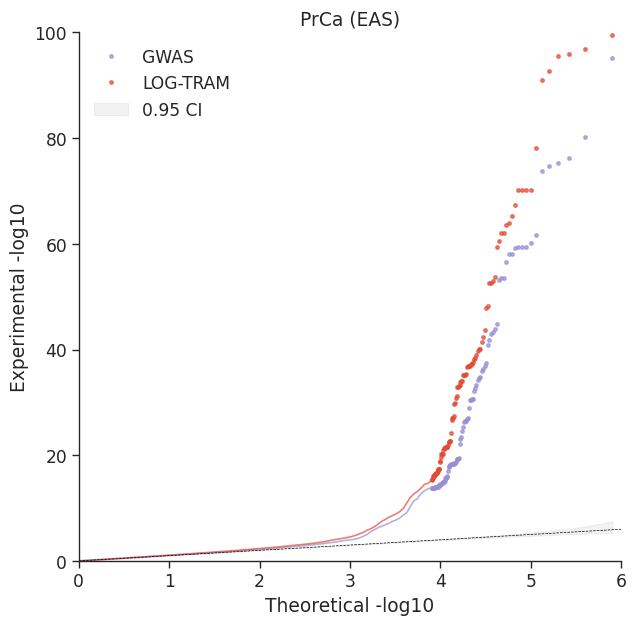

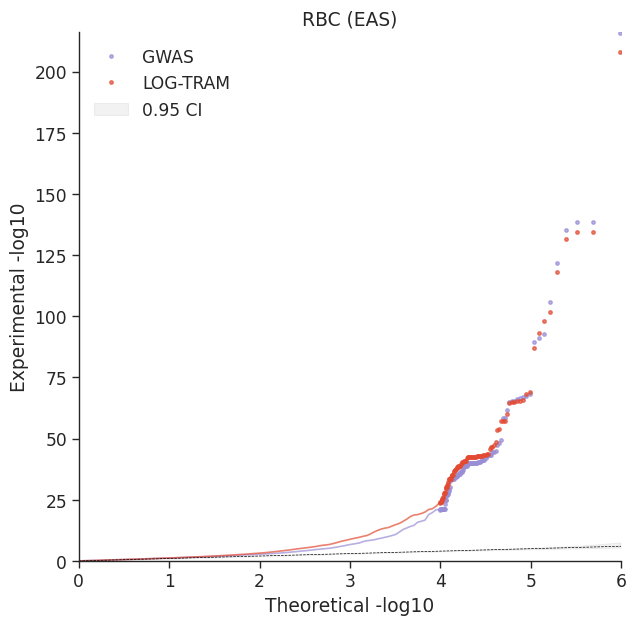

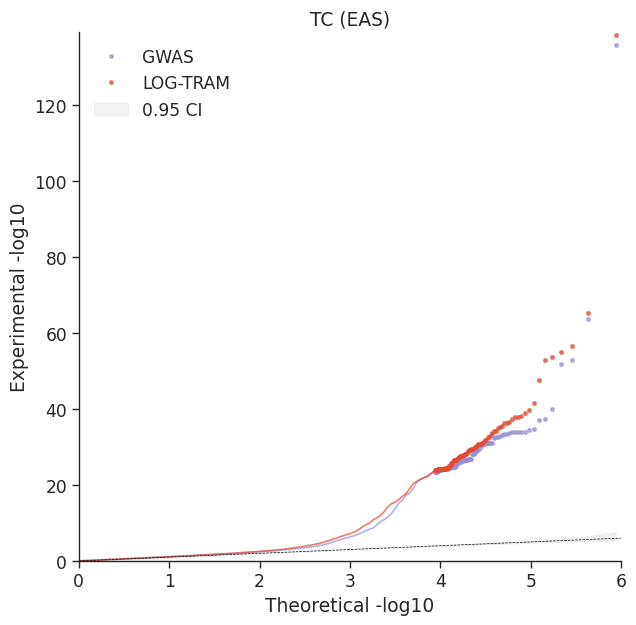

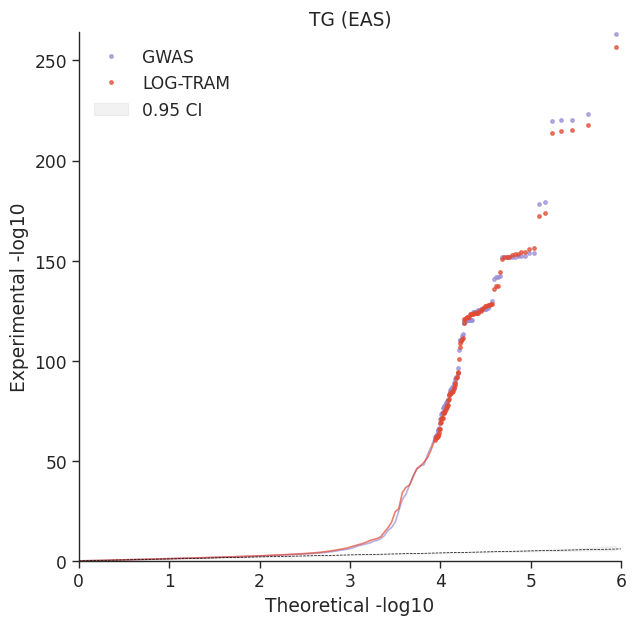

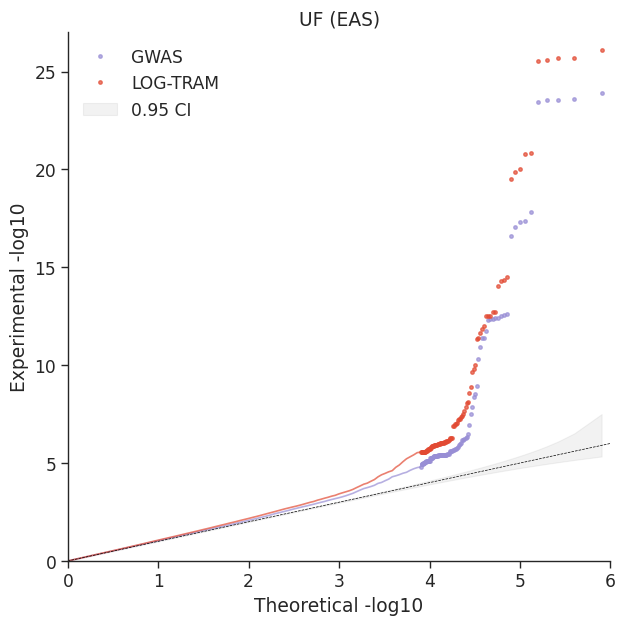

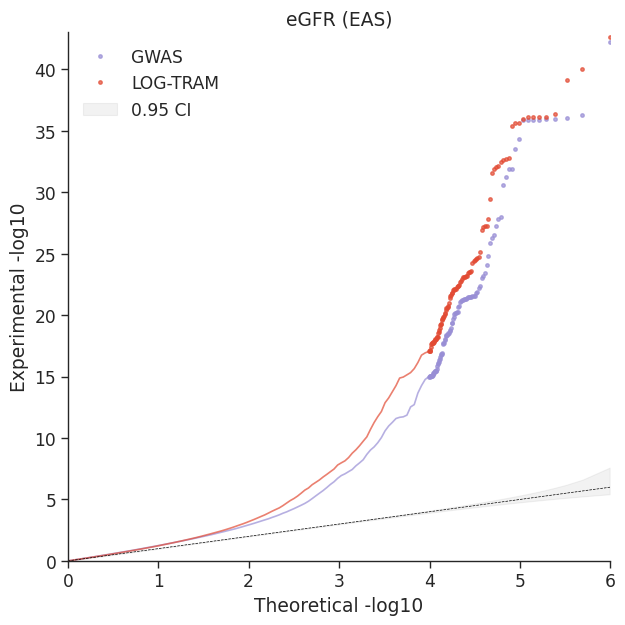

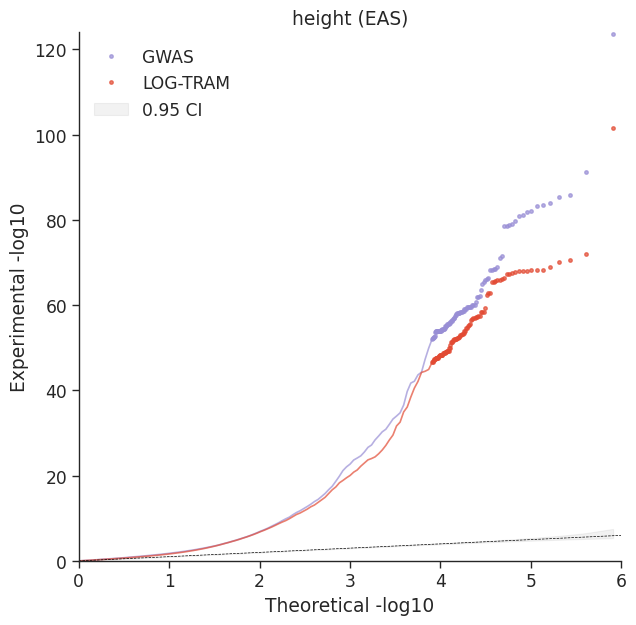

In [4]:
for i in Traits:
    eas_gwas = pd.read_csv('{}_harmonized_pop2_EAS.txt'.format(i),sep='\t')
    eas_meta = pd.read_csv('{0}_meta_TRAM_pop2_{0}_EAS.txt'.format(i),sep='\t')
    eas_gwas = eas_gwas.loc[eas_gwas['SNP'].isin(eas_meta['SNP'])]    
    qqplotwrapper(eas_gwas,eas_meta,i)

### Manhatton plot

In [5]:
# identify lead SNPs from GWAS summary statistics
def add_locus(gwas):
    gwas_sig = gwas.loc[gwas['P']<=5e-8].reset_index(drop=True)
    loci = []
    c = 0
    bp = -1
    l = -1
    for row in gwas_sig.iterrows():
        if c!=row[1]['CHR'] or row[1]['BP']-bp>1000000:
            c = row[1]['CHR']
            bp = row[1]['BP']
            l += 1
        loci.append(l)
    gwas_sig['loci'] = loci
    gwas_sig = gwas_sig.loc[gwas_sig.groupby('loci')['P'].idxmin()].reset_index(drop=True)
    return gwas_sig


def manhattanwrapper(eas_meta,eas_meta_sig,i):
    sns.set_context('paper',font_scale=1.5)
    chrs = [str(i) for i in range(1,23)]
    chrs_names = np.array([str(i) for i in range(1,23)])
    mpl.rcParams['figure.dpi']=100
    mpl.rcParams['savefig.dpi']=100
    mpl.rcParams['figure.figsize']=12, 8
    mpl.rcParams['axes.spines.right'] = False
    mpl.rcParams['axes.spines.top'] = False
    colors = ['skyblue','#000080']*11
    fig, ax = plt.subplots(1,1)
    manhattan(eas_meta['P'], eas_meta['BP'], eas_meta['CHR'].astype(str), '',
              p2=eas_meta_sig['P'], pos2=eas_meta_sig['BP'], chr2=eas_meta_sig['CHR'].astype(str), label2='',
           plot_type='single',
           chrs_plot=[str(i) for i in range(1,23)],
           chrs_names=chrs_names,
           cut = 0,
           title='{}'.format('LOG-TRAM ({}, EAS)'.format(i)),
           xlabel='chromosome',
           ylabel='-log10(p-value)',
           lines= [7.3],
           lines_styles = ['--'],
           top1=31,
           top2=31,
           lines_colors=['grey'],
           colors = colors,
           scaling = '-log10',alpha=0.9)

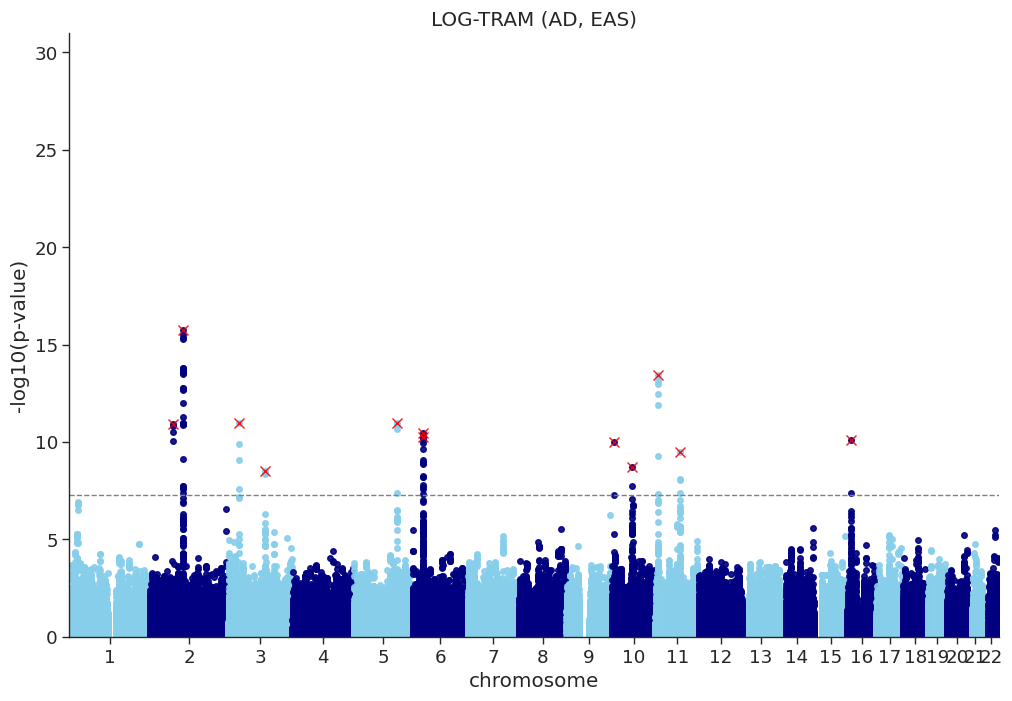

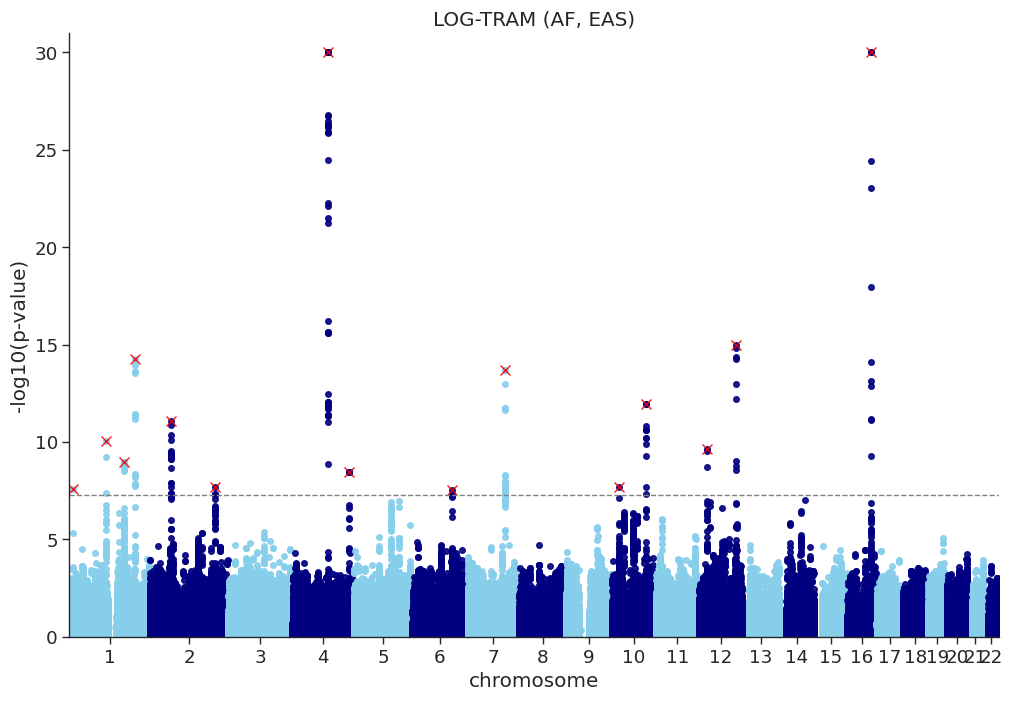

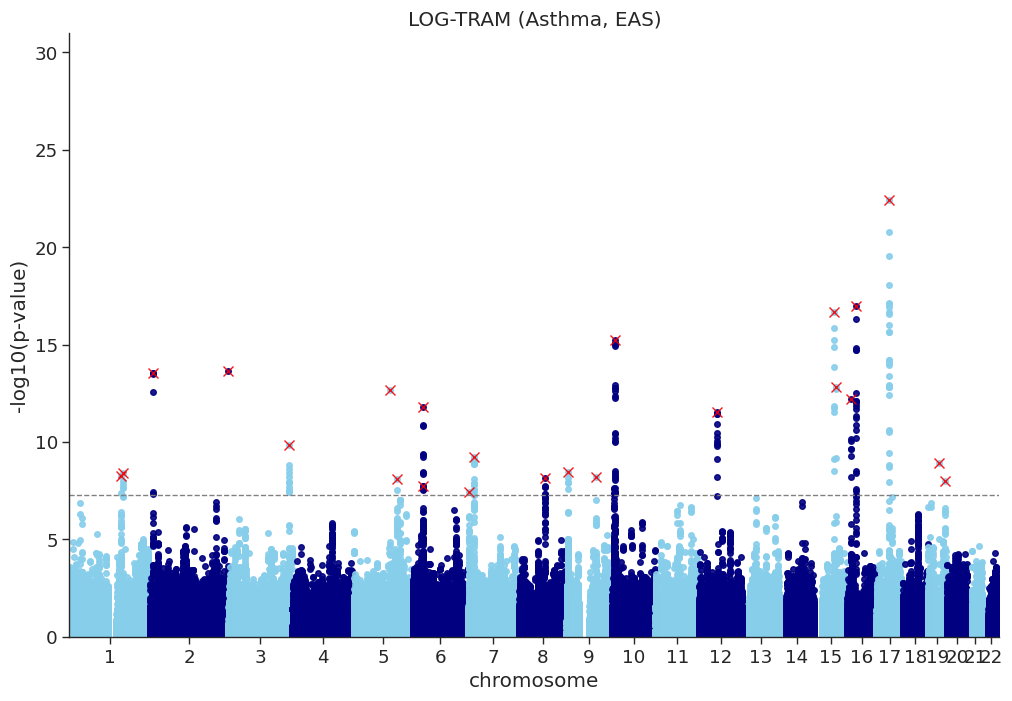

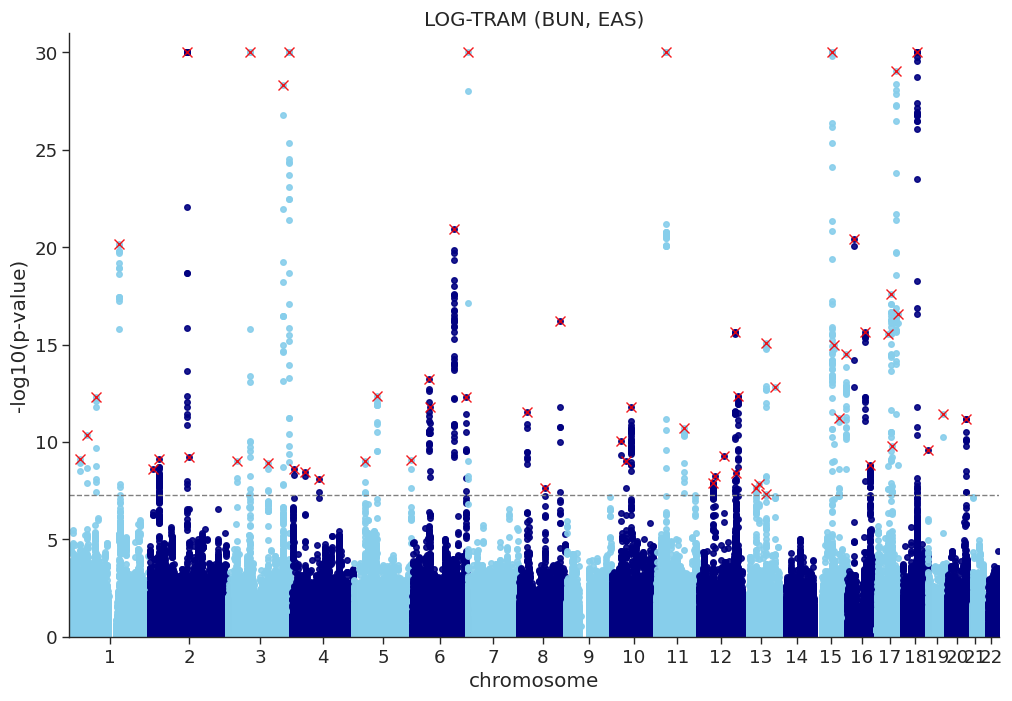

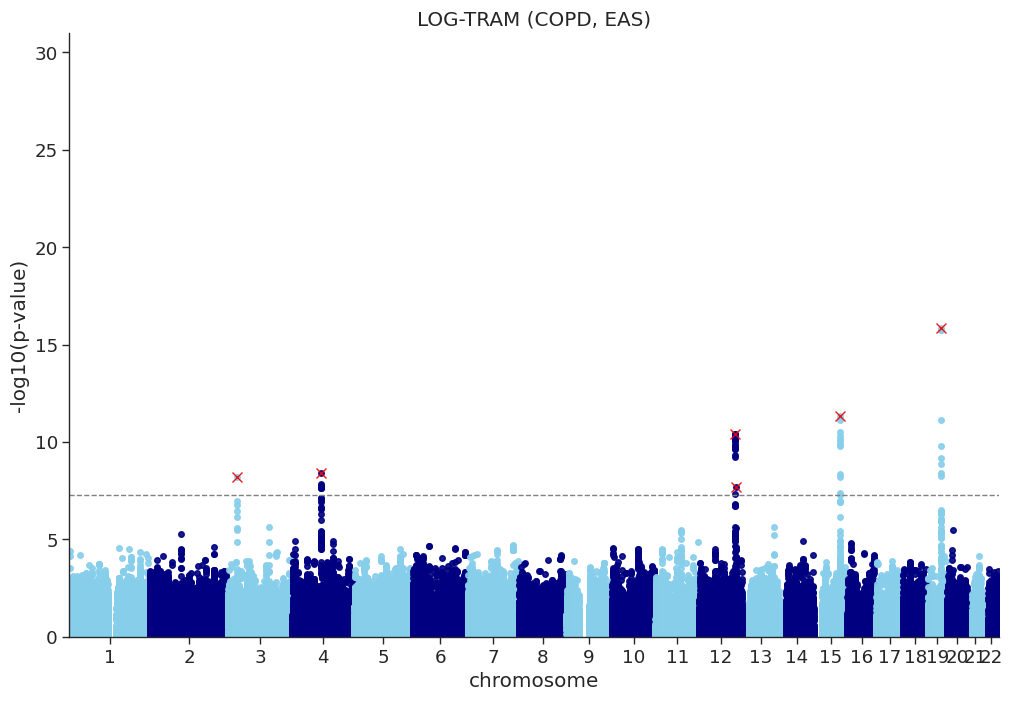

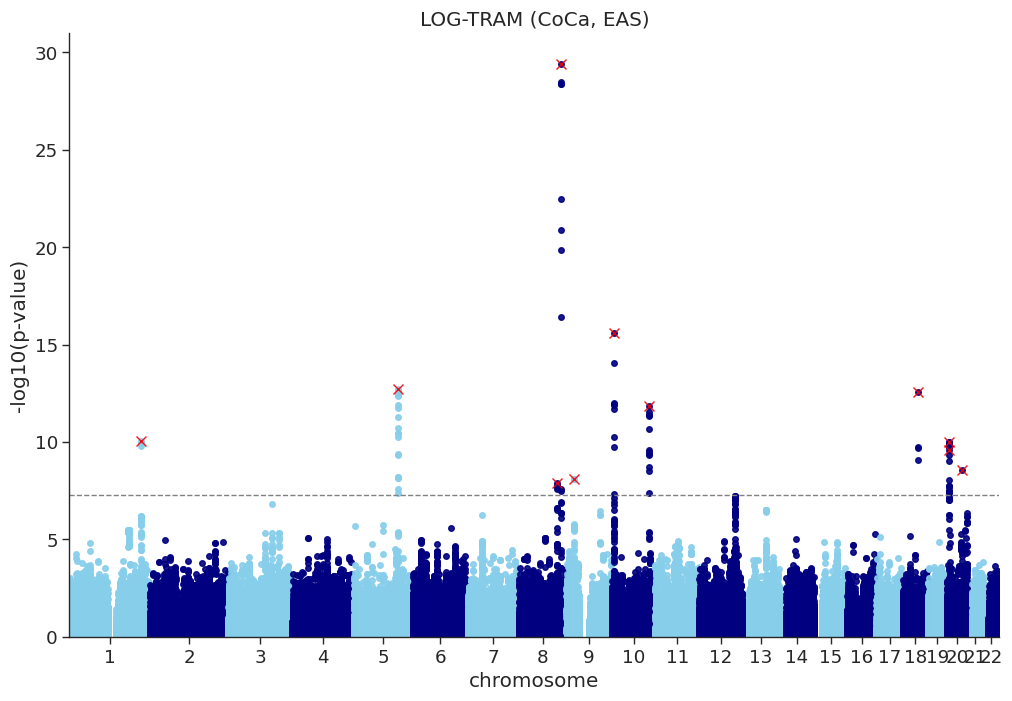

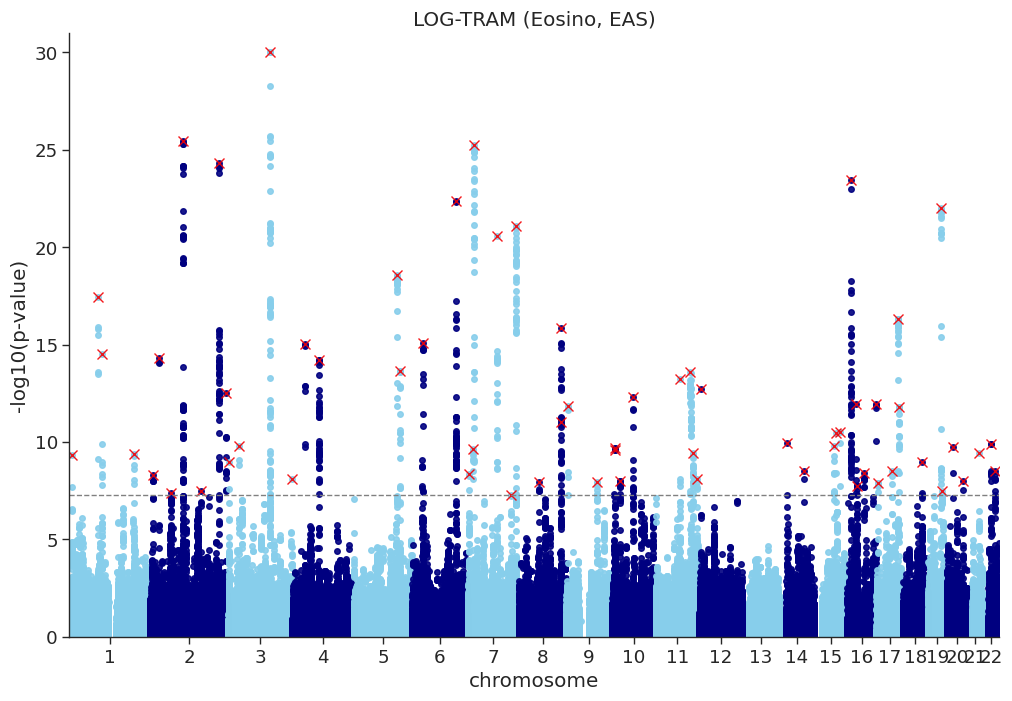

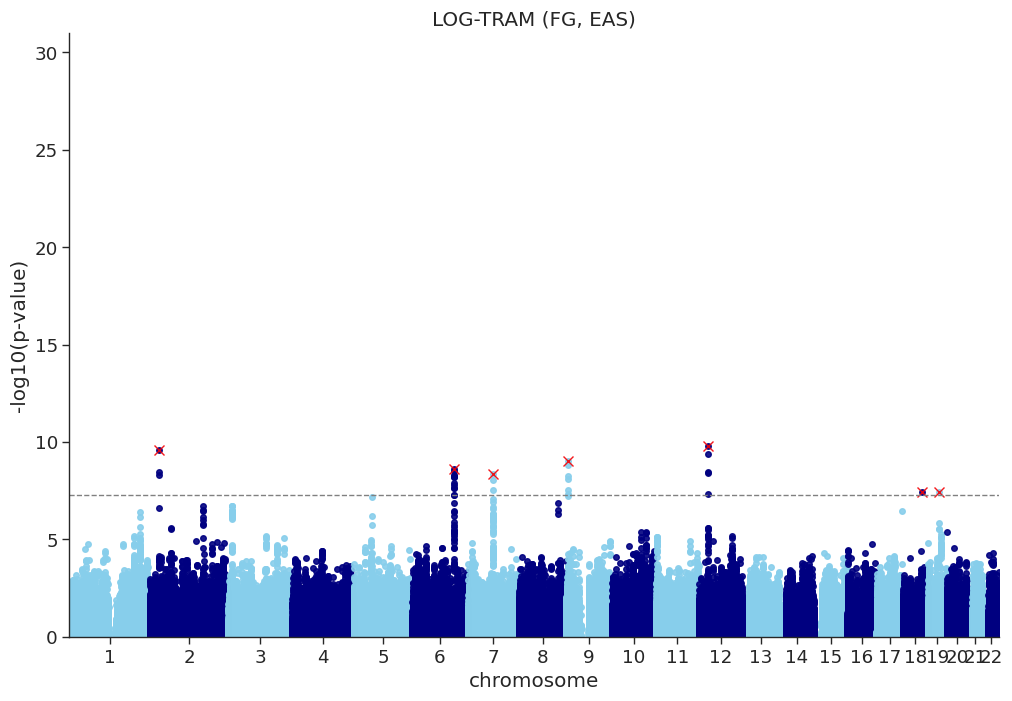

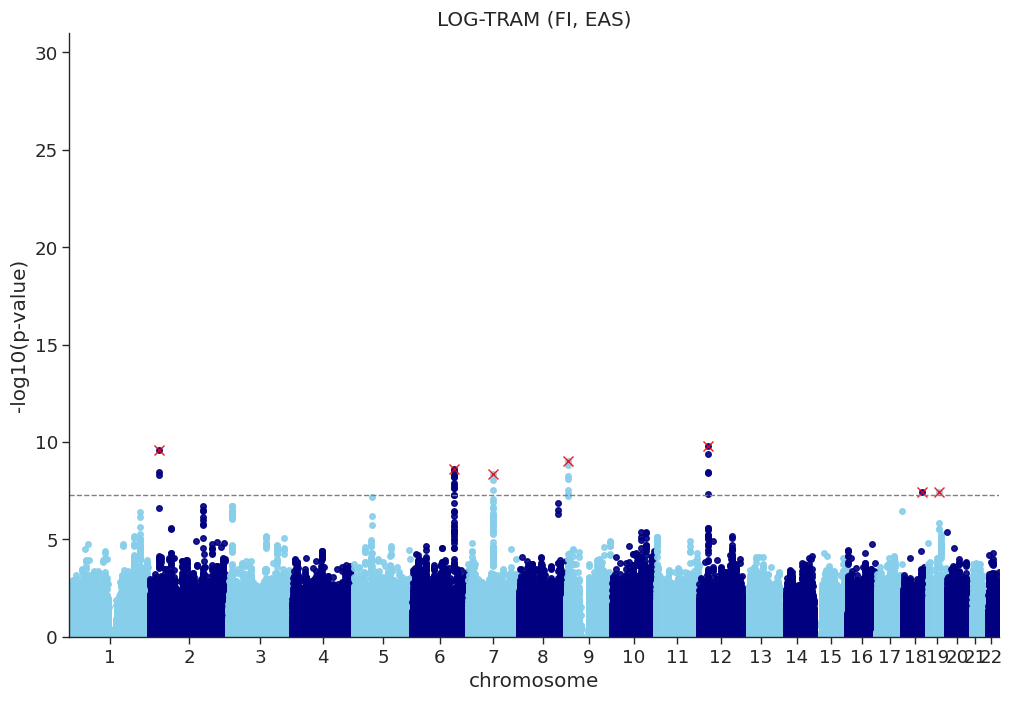

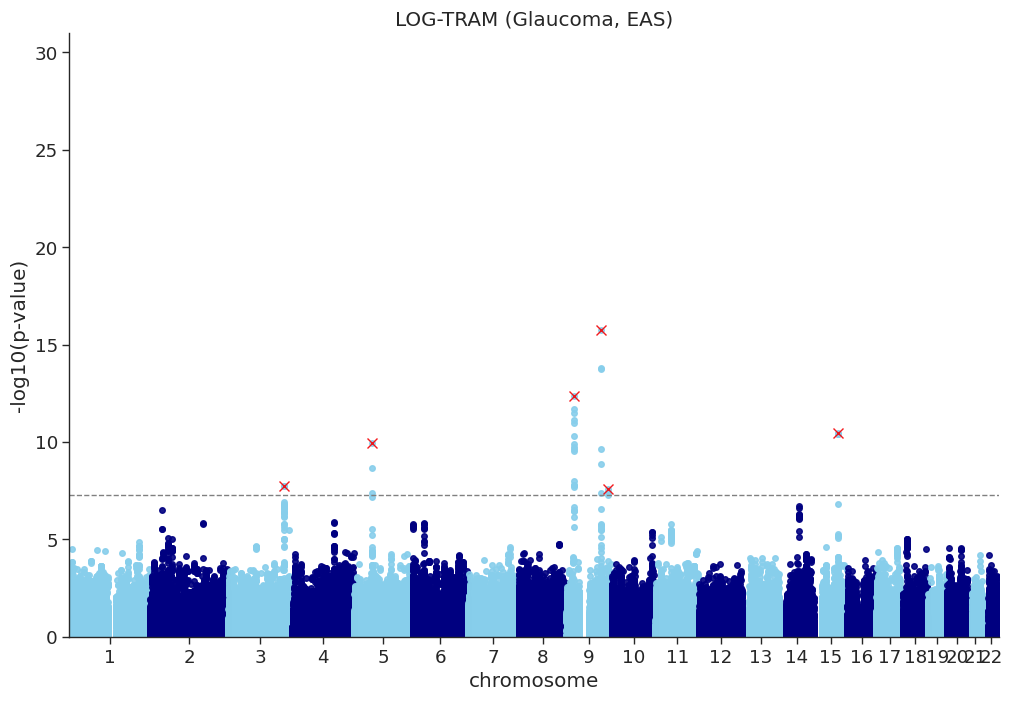

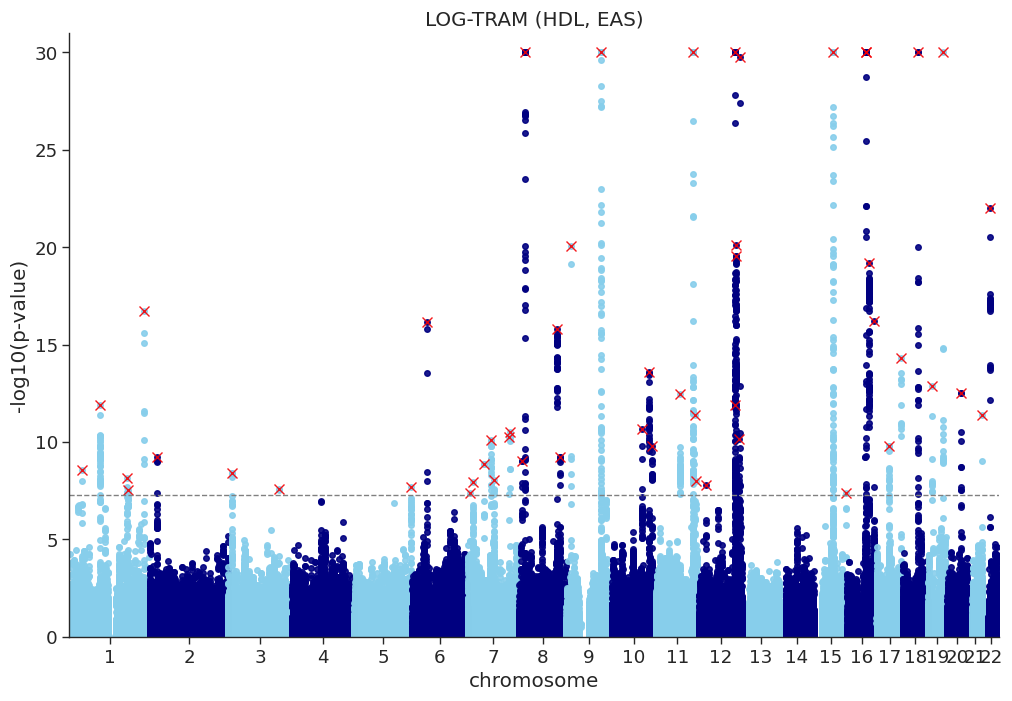

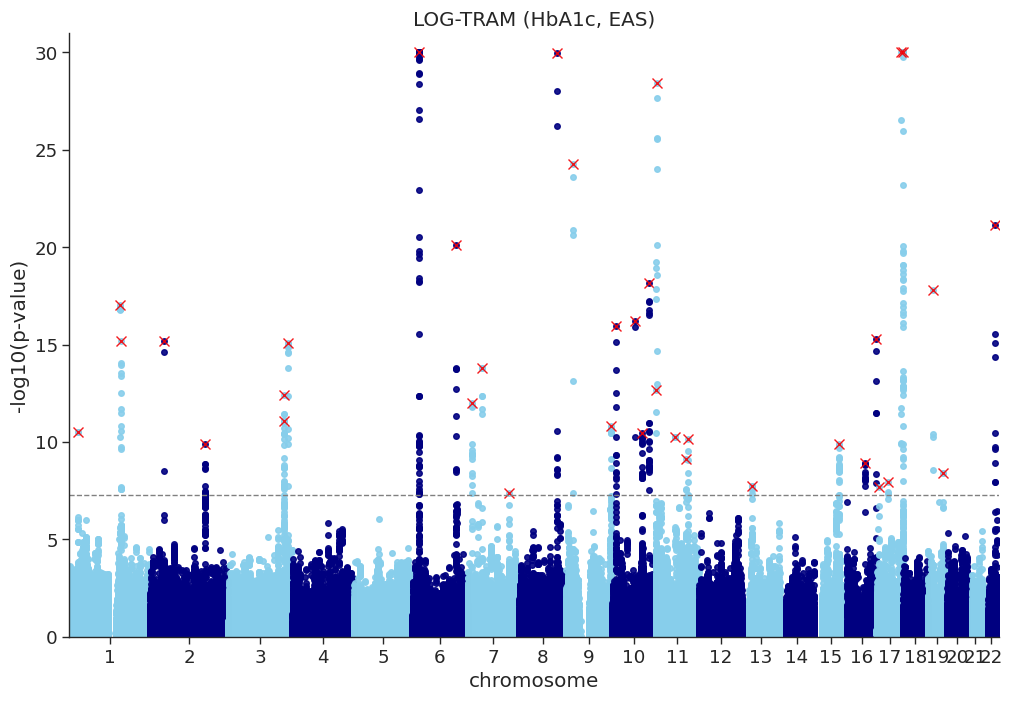

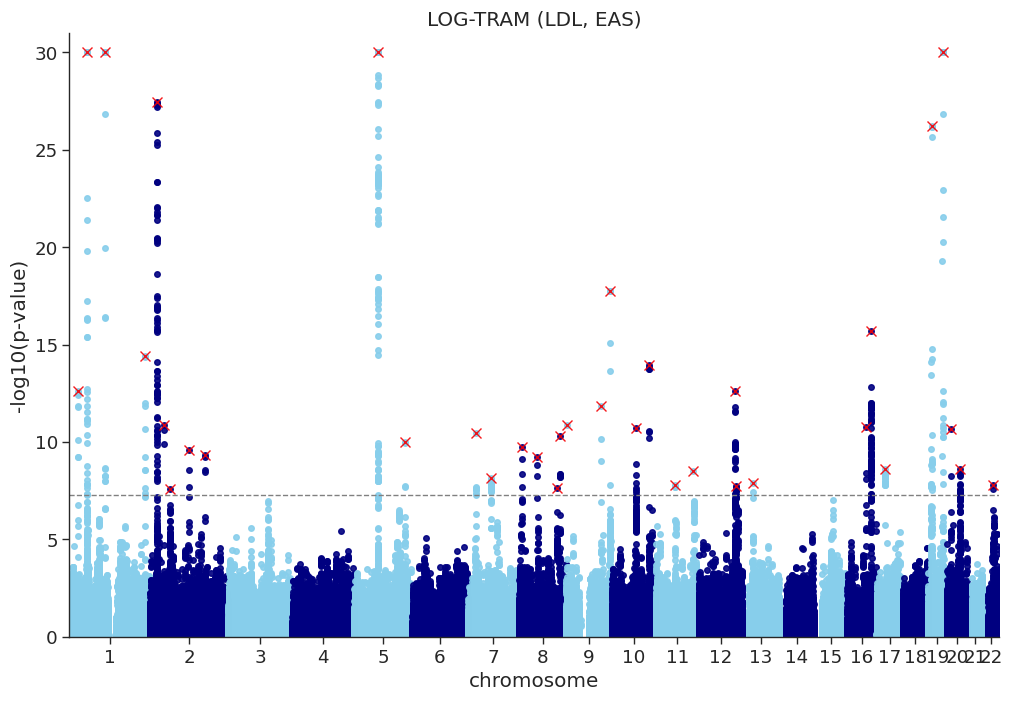

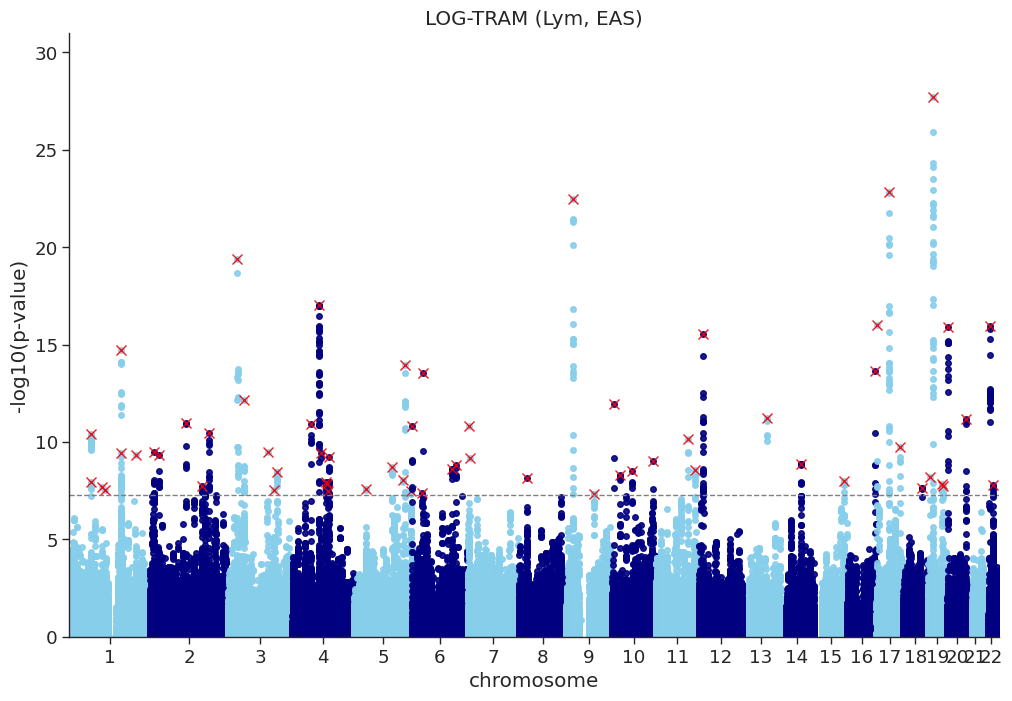

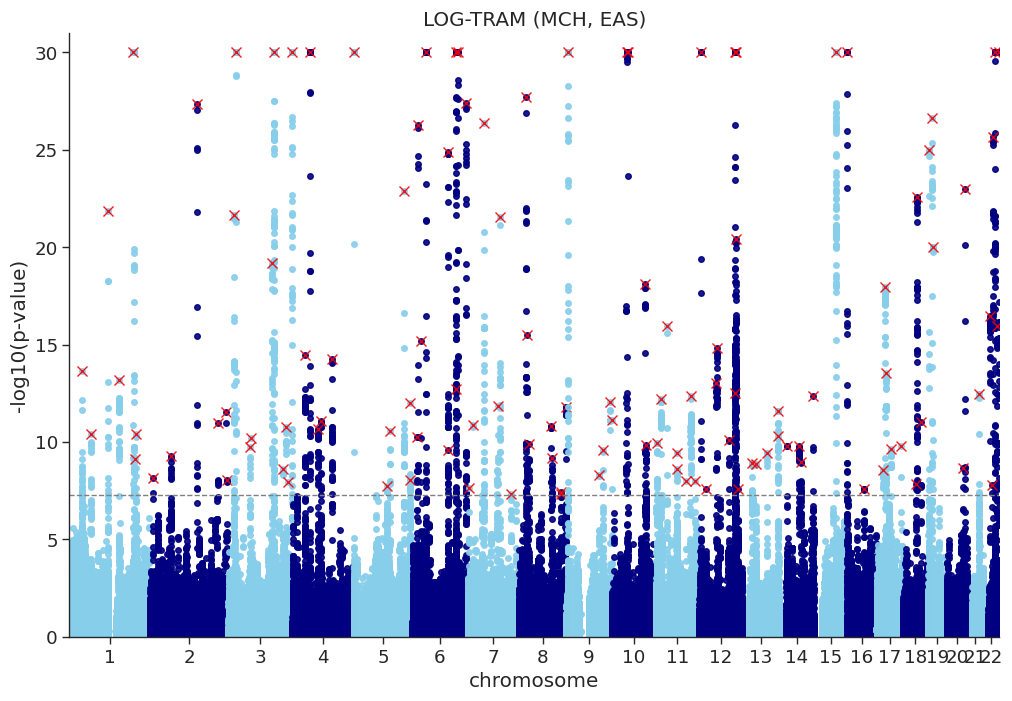

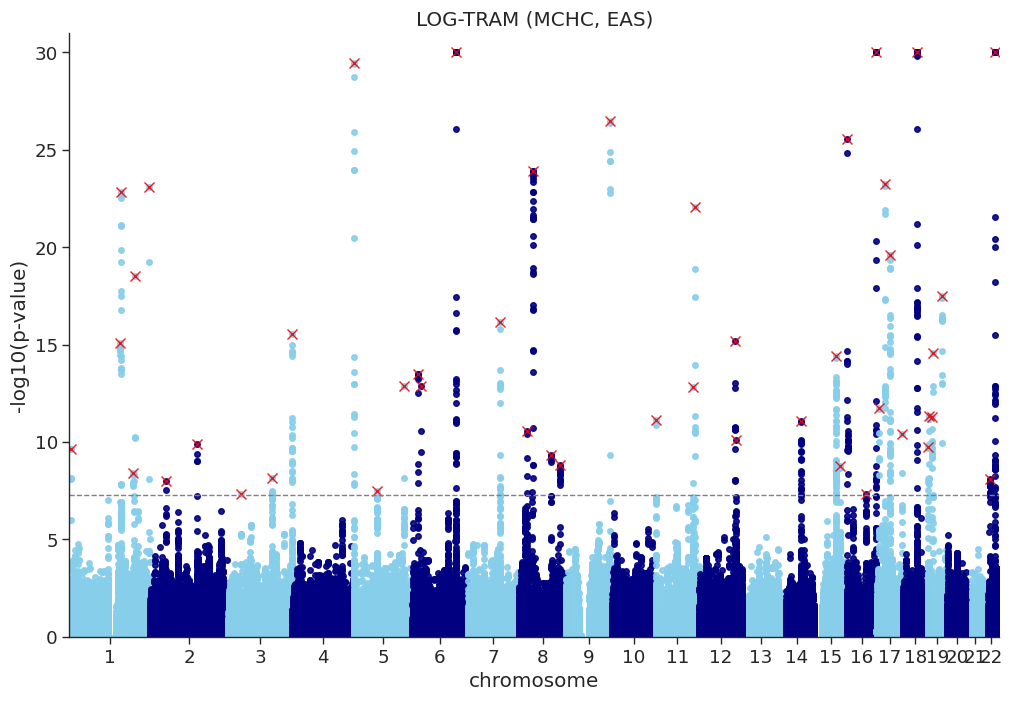

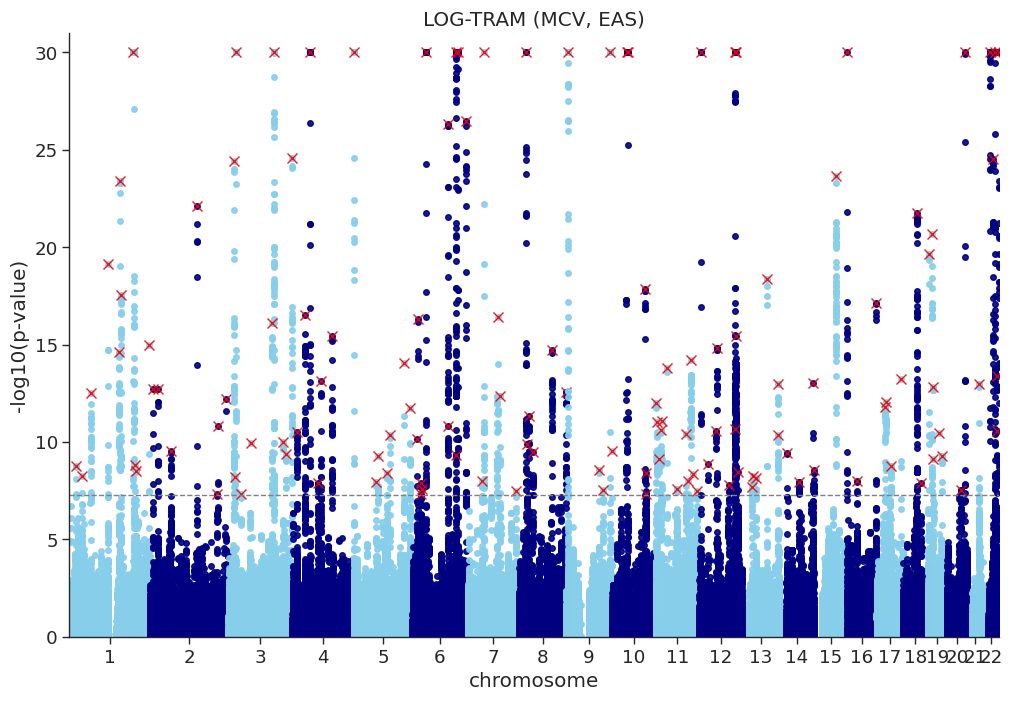

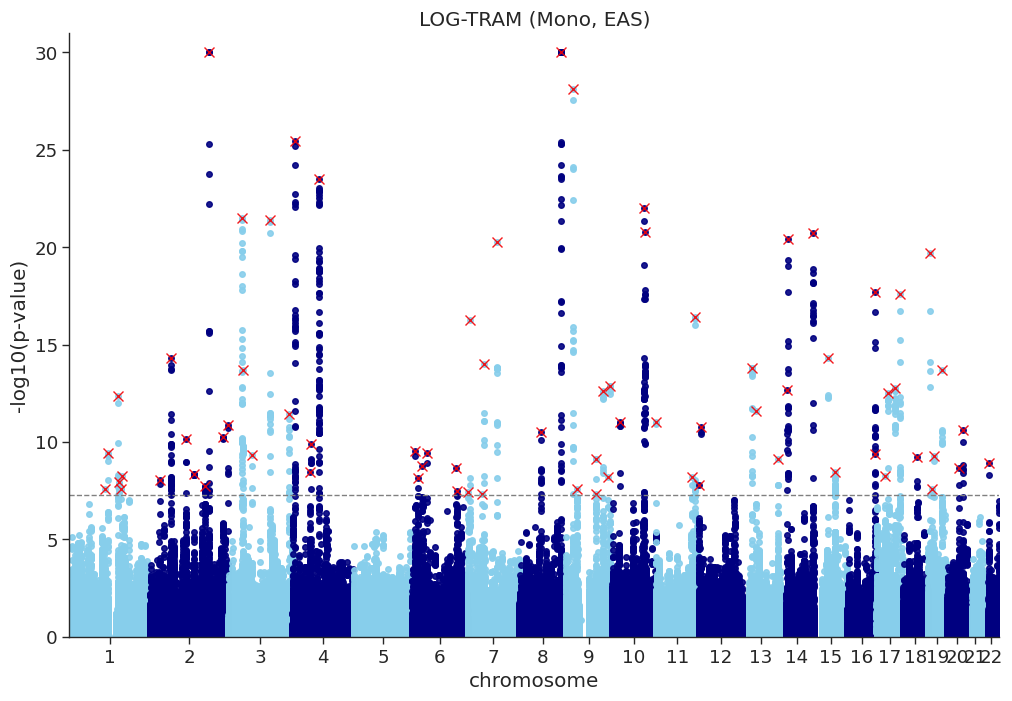

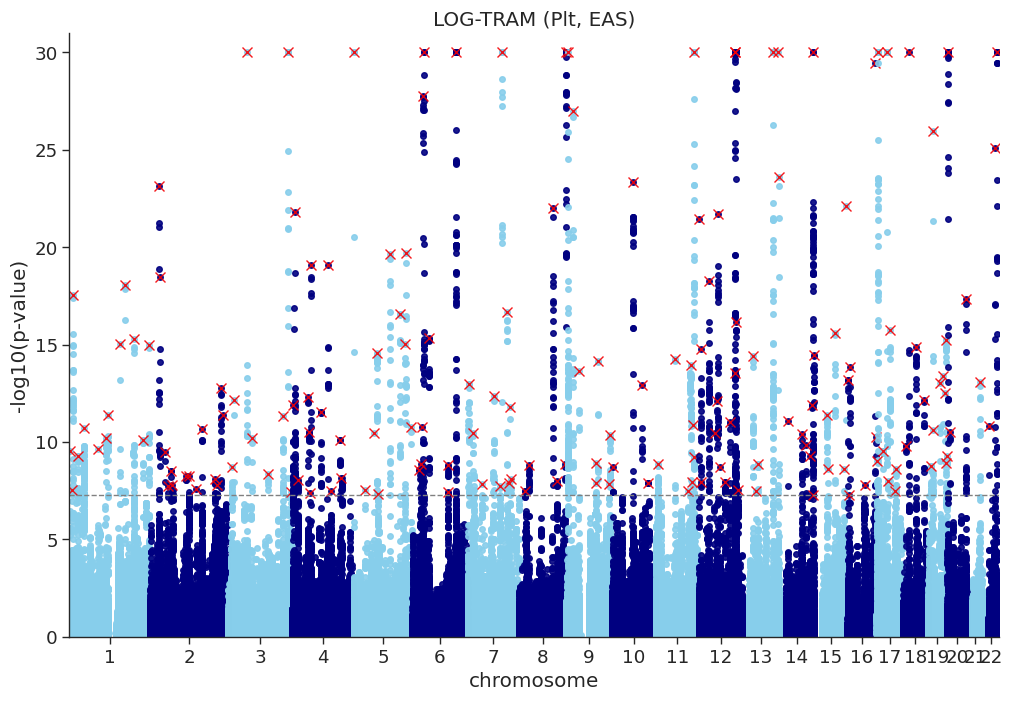

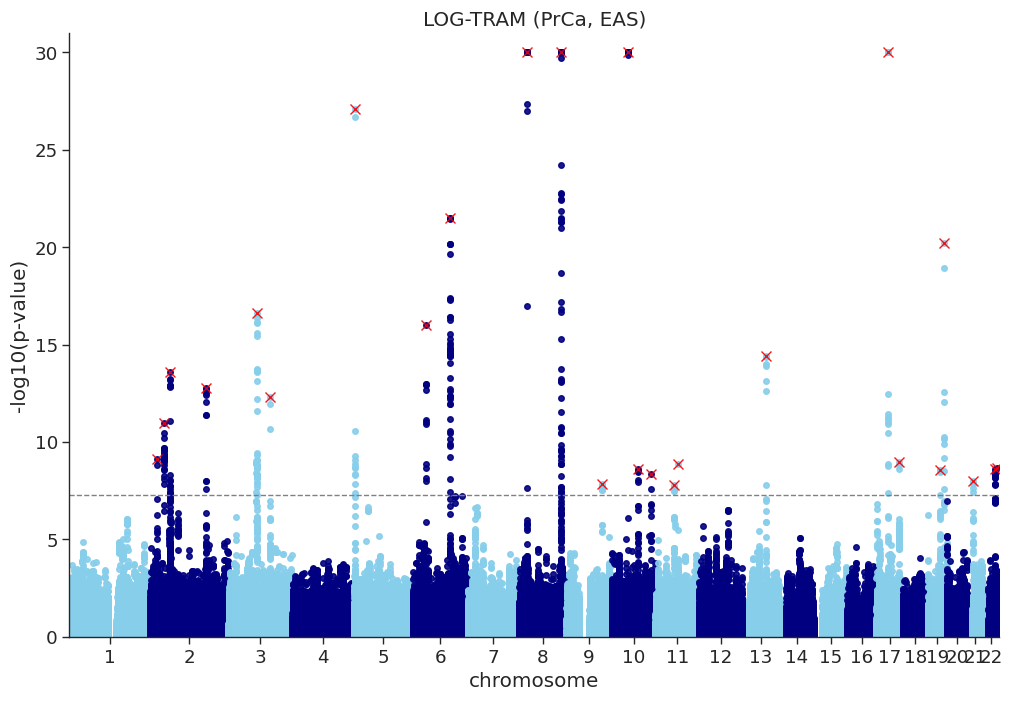

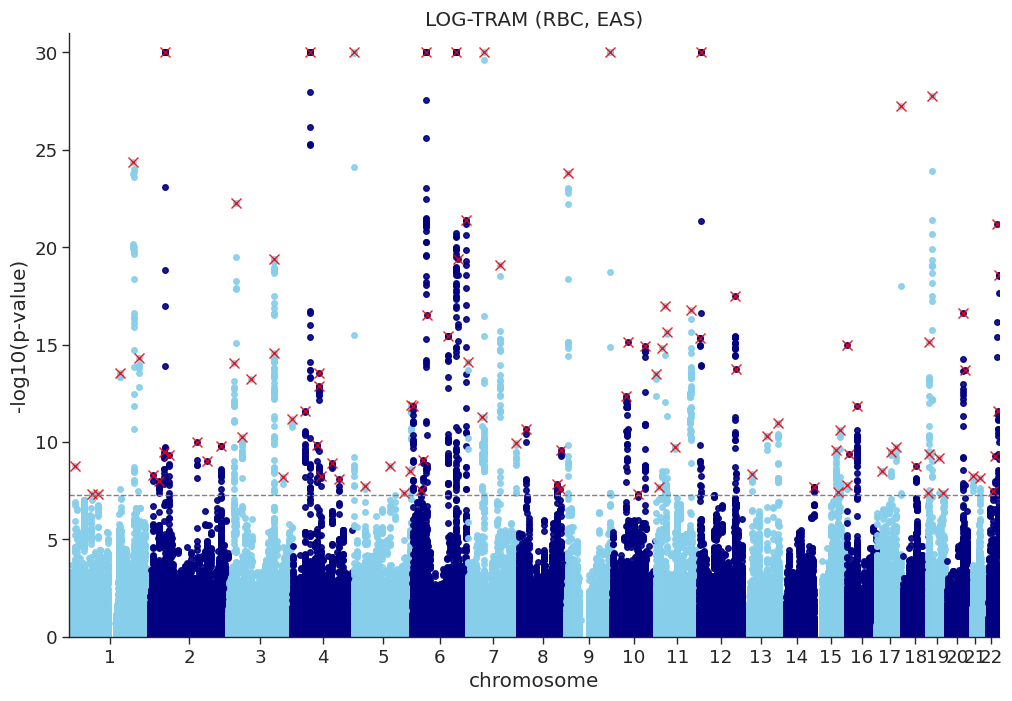

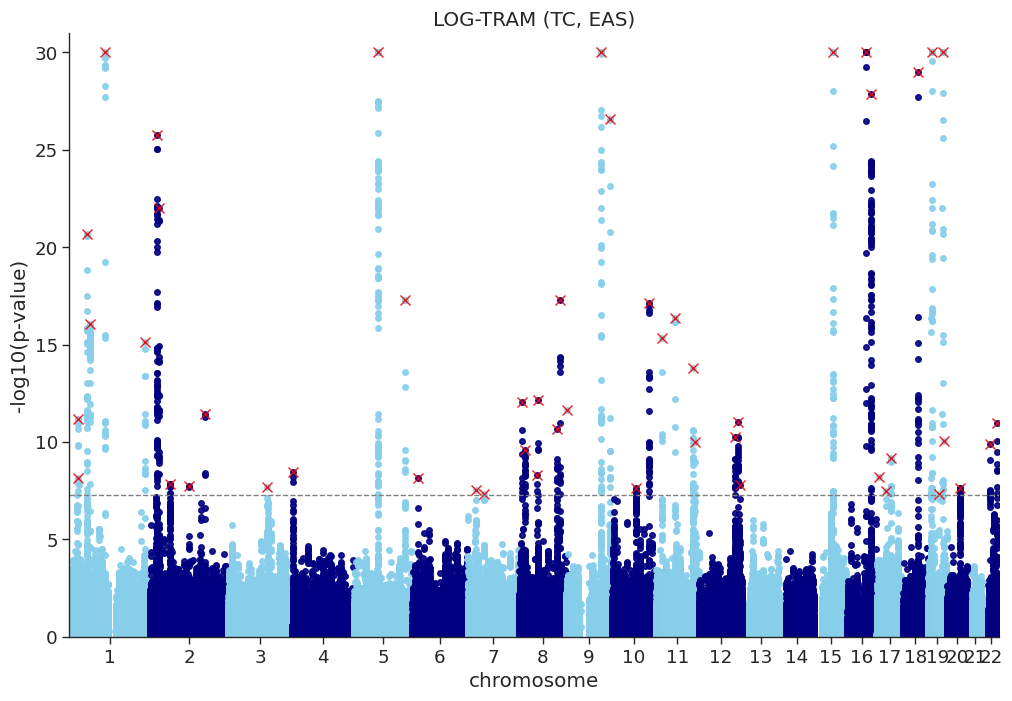

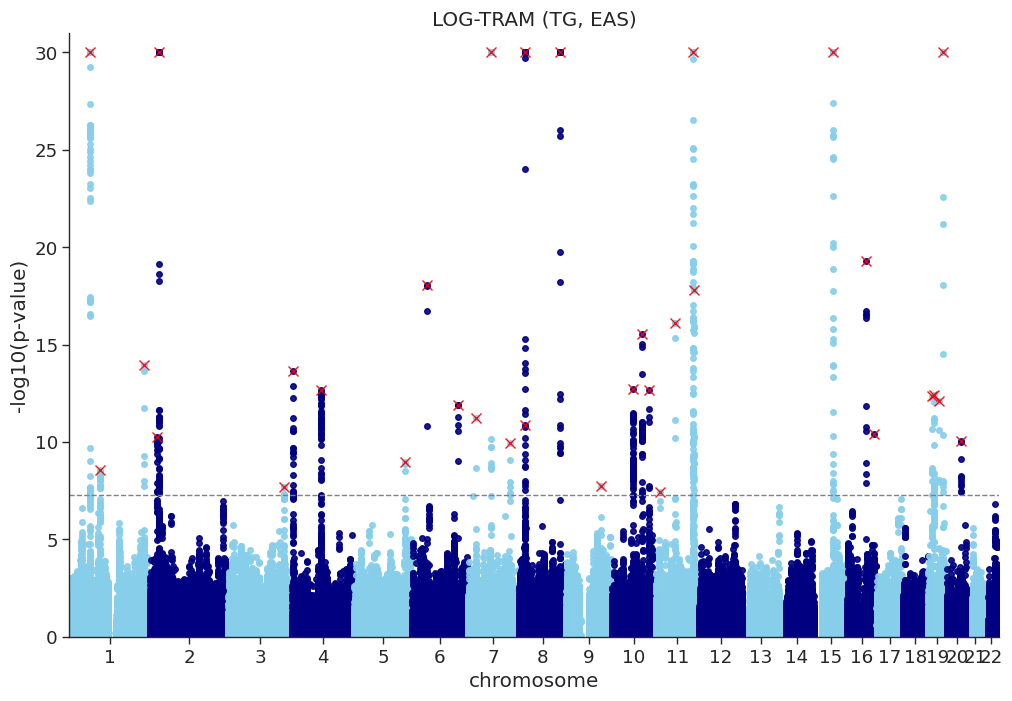

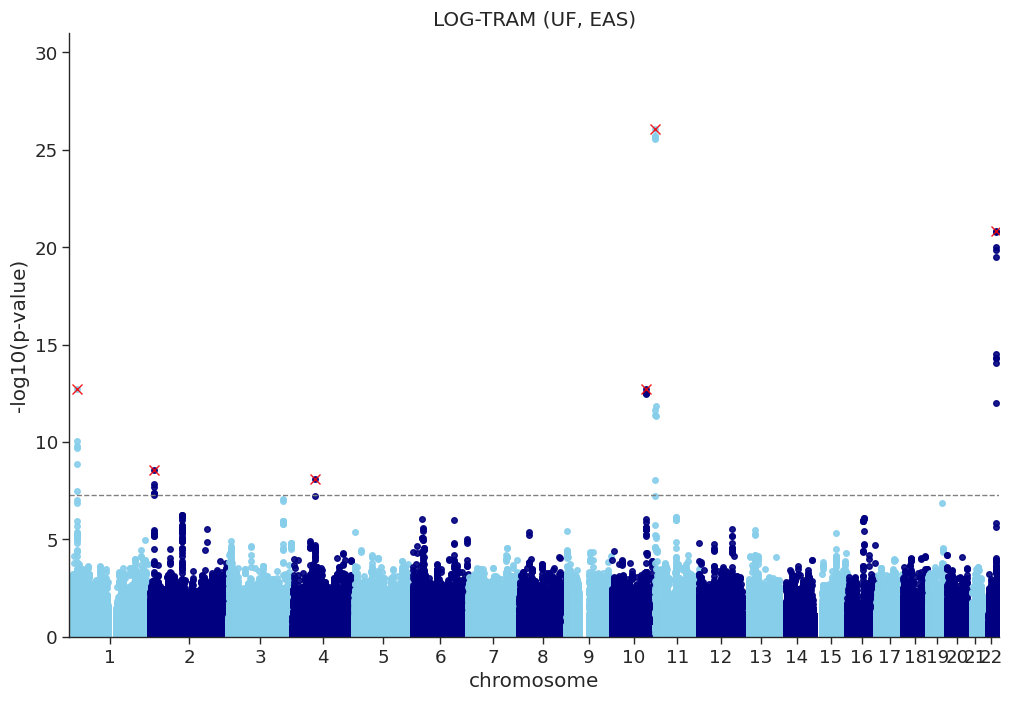

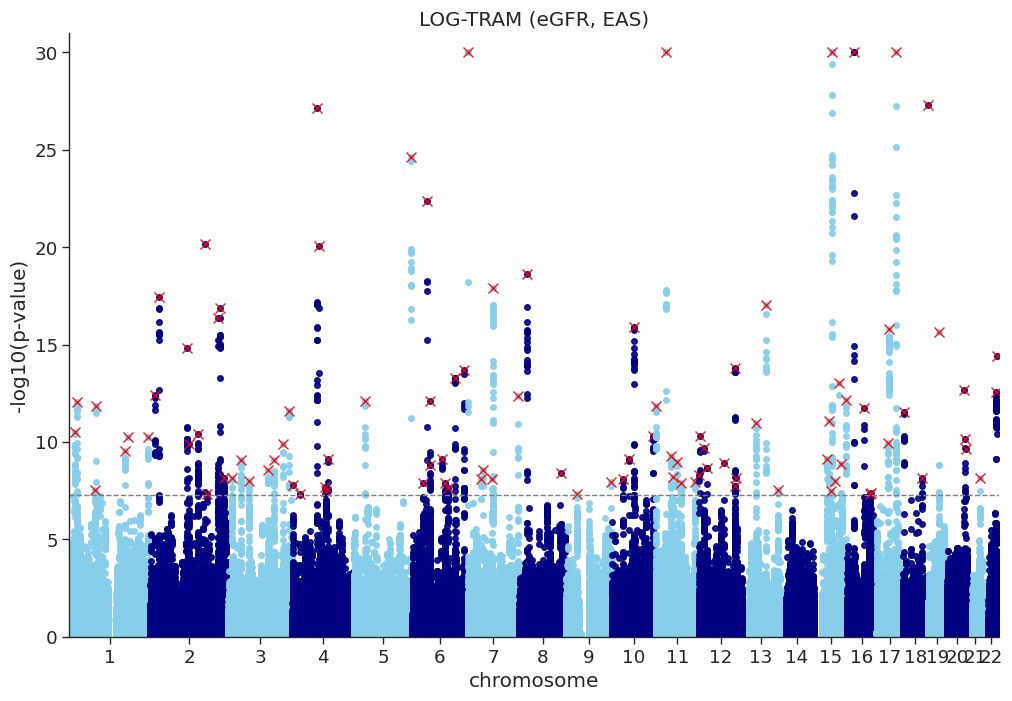

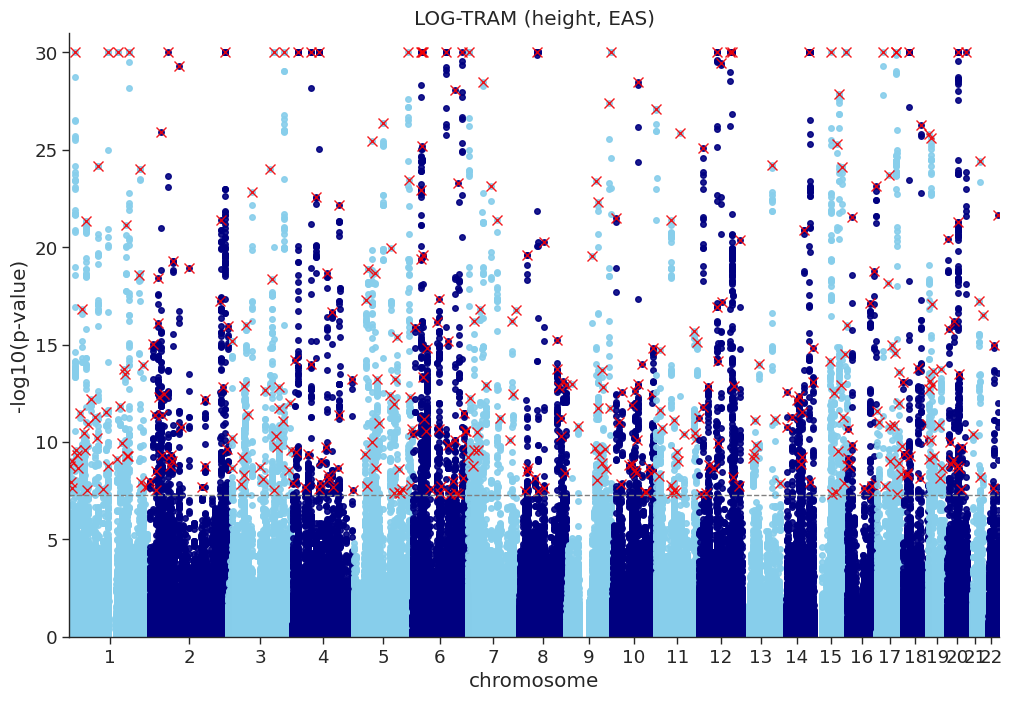

In [6]:
for i in Traits:
    eas_meta = pd.read_csv('{0}_meta_TRAM_pop2_{0}_EAS.txt'.format(i),sep='\t')
    threshold = 1e-30
    eas_meta.loc[eas_meta['P']<threshold,'P'] = threshold
    eas_meta_sig = add_locus(eas_meta)
    manhattanwrapper(eas_meta,eas_meta_sig,i)    

## Effective sample size

In [53]:
Traits = 'AD,AF,Asthma,BMI,BUN,COPD,CoCa,Eosino,FG,FI,Glaucoma,HDL,HbA1c,LDL,Lym,MCH,MCHC,MCV,Mono,Plt,PrCa,RBC,SBP,T2D,TC,TG,UF,eGFR,height'.split(',')
gwas_n = []
meta_n = []
for i in Traits:
    eas_meta = pd.read_csv('{0}_meta_TRAM_pop2_{0}_EAS.txt'.format(i),sep='\t')
    gwas_n.append(eas_meta['N'].median())
    meta_n.append(eas_meta['N_eff'].median())

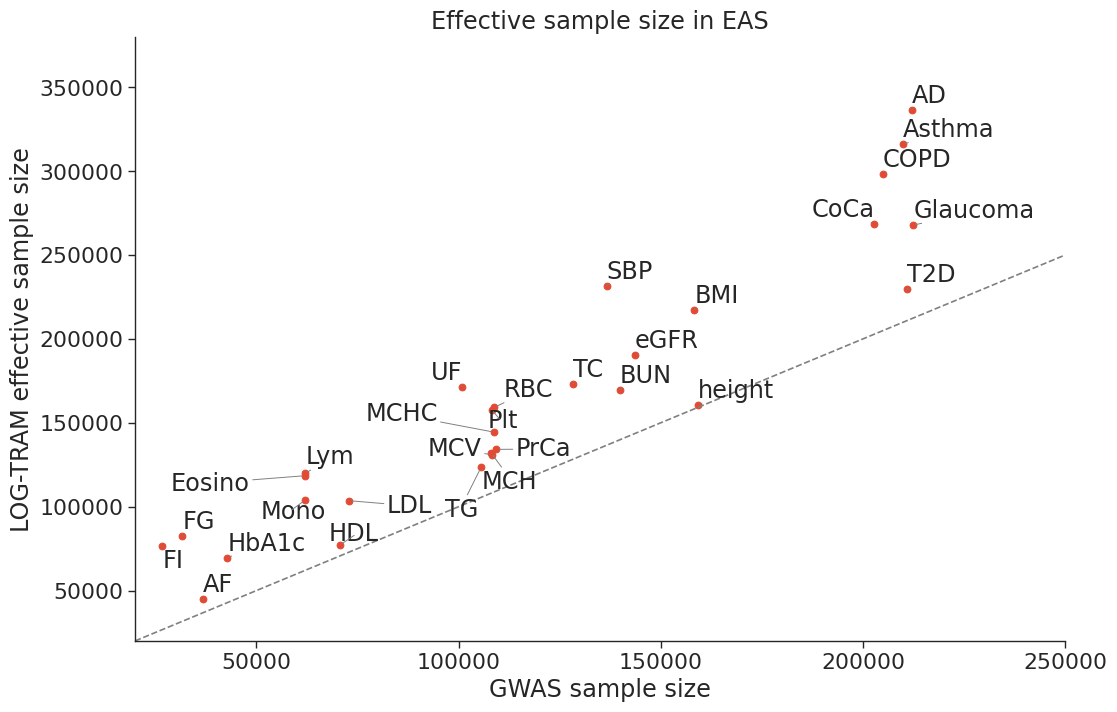

In [67]:
from adjustText import adjust_text
sns.set_context('paper',font_scale=1.8)
plt.scatter(gwas_n, meta_n)
plt.plot(np.arange(20000, 250000),np.arange(20000, 250000),'--',c='grey')
    
texts = []
for x, y, s in zip(gwas_n, meta_n, Traits):
    texts.append(plt.text(x, y, s))

adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="-", color='grey', lw=0.7))

plt.xlim((20000, 250000))
plt.ylim((20000, 380000))

plt.xlabel('GWAS sample size')
plt.ylabel('LOG-TRAM effective sample size')
plt.title('Effective sample size in EAS')

plt.show()